In [2]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/Complete_Data/All_Four_Datasets.csv')
df['Date']=pd.to_datetime(df['Date']).dt.date
predictors = ['Public Holidays','School Holidays','Payday','unemployment rate','PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN','Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday','Wednesday', 'April', 'August', 'December', 'February', 'January','July', 'June', 'March', 'May', 'November', 'October', 'September']
target = 'TOTAL'
X = df[predictors]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
print(gbr.score(X_train, y_train))
print(gbr.score(X_test, y_test))

0.5604391984313601
0.4842052155197506


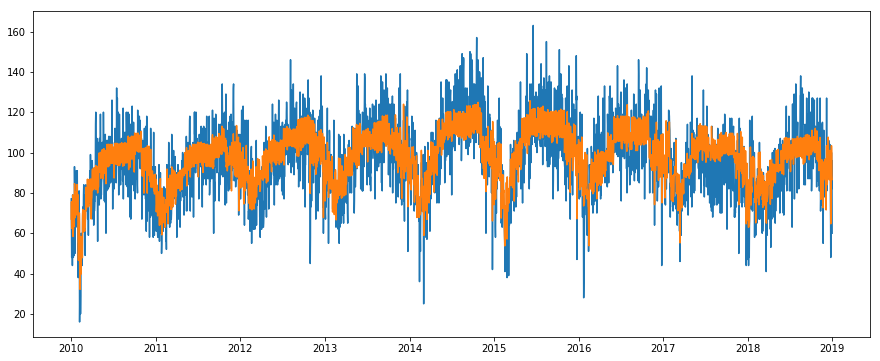

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(df['Date'], df['TOTAL'])
plt.plot(df['Date'], gbr.predict(df[predictors]))

Train score at  25  estimators : 0.42988906117532166
Test score at  25  estimators : 0.3793386928746447
Train score at  50  estimators : 0.5014826168961759
Test score at  50  estimators : 0.43980093680309995
Train score at  100  estimators : 0.5604391984313601
Test score at  100  estimators : 0.4858498261833778
Train score at  150  estimators : 0.5909145370315662
Test score at  150  estimators : 0.4966417630476533
Train score at  200  estimators : 0.6159466792488433
Test score at  200  estimators : 0.5013195105282156
Train score at  500  estimators : 0.7032474008182648
Test score at  500  estimators : 0.49169540308166426


[Text(0,0,'25'),
 Text(0,0,'50'),
 Text(0,0,'100'),
 Text(0,0,'150'),
 Text(0,0,'200'),
 Text(0,0,'500')]

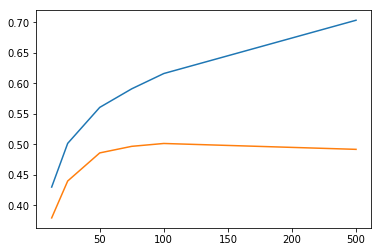

In [19]:

estimators = [25,50,100,150,200, 500]
train_scores = []
test_scores = []
for n in estimators: 
    gbr = GradientBoostingRegressor(n_estimators=n)
    gbr.fit(X_train, y_train)
    print("Train score at ",n," estimators :", gbr.score(X_train, y_train))
    print("Test score at ",n," estimators :", gbr.score(X_test, y_test))
    train_scores.append(gbr.score(X_train, y_train))
    test_scores.append(gbr.score(X_test, y_test))

fig = plt.figure() 
ax = fig.add_subplot(111)
ax.plot(estimators, train_scores)
ax.plot(estimators, test_scores)
ax.set_xticklabels(estimators)

Train score at  2  estimators : 0.4904325178586567
Test score at  2  estimators : 0.4495225518460998
Train score at  3  estimators : 0.5604391984313601
Test score at  3  estimators : 0.48615293567423556
Train score at  4  estimators : 0.6297840897418876
Test score at  4  estimators : 0.49647852862003006
Train score at  5  estimators : 0.7021863075105763
Test score at  5  estimators : 0.49190934034364
Train score at  6  estimators : 0.7766326416831869
Test score at  6  estimators : 0.4809143764907814


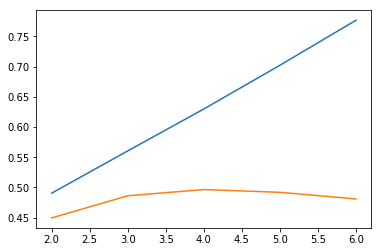

In [22]:
# MSE, MAE, MAPE, R2
depth = [2,3,4,5, 6]
train_scores = []
test_scores = []
for n in depth: 
    gbr = GradientBoostingRegressor(max_depth = n)
    gbr.fit(X_train, y_train)
    print("Train score at ",n," estimators :", gbr.score(X_train, y_train))
    print("Test score at ",n," estimators :", gbr.score(X_test, y_test))
    train_scores.append(gbr.score(X_train, y_train))
    test_scores.append(gbr.score(X_test, y_test))


plt.plot(depth, train_scores)
plt.plot(depth, test_scores)
